<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2 (2022)</h1>

-----

|**Maximum Marks**         |**100 for COMP2420 and 120 for COMP6420 students**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **11.59M, Tuesday, May 24th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this assignment:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment_2_2022_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) [Please note that if you have to pull from the upstream repo you will need to change the name back first and add your uid after the pull again]
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them. You can change these to Markdown cells where necessary (e.g. you may need to include some figures in your answer).
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Introduction

This introduction has been split into three sections, based on the datasets you will be interacting with: **CVSS Data**, **BitcoinHeist**, and **Sakila**.


### CVSS Data
Sound familiar? We hope so. You are being provided with the same dataset from the assignment 1, with an additional csv file. For a refresher, go check the [about.md](./data/cvss/about.md) file. The provided files are:
- cvss_data_complete.csv
- cve_configurations_mapping.csv
- cwe_capec_mapping.csv


### BitcoinHeist
We will be using a subset of data from a UCI Machine Learning Repository [dataset](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset) that contains parsed Bitcoin transaction graphs from 2009 January to 2018 December. BitcoinHeist dataset contains address features on the heterogeneous Bitcoin network to identify ransomware payments. We will be using this dataset to predict whether a given record is white (i.e., not known to be ransomware) or not (i.e., known to be ransomware).


### Sakila
To test your SQL muscles, we have provided a database (and the creation scripts) for a sample SQL database called Sakila made available by MySQL under a BSD licence. The Sakila sample database is a fictitious database designed to represent a DVD rental store. The tables of the database include film, film_category, actor, customer, rental, payment and inventory among others.. We have provided the Database diagram in Q3 for reference.

Detailed information about the database can be found on the MySQL website: https://dev.mysql.com/doc/sakila/en/


#### In summary, you have three (3) datasets to work with in this assignment, broken down as follows:

- Question 1 & 4 - CVSS data
- Question 2 - BitcoinHeist
- Question 3 - Sakila

Once again, the CVSS dataset is a sizable dataset, so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.


****

In [1]:
# Code Imports
# Every import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn import metrics                             # metrics

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#
from sklearn.model_selection import cross_validate        # cross validation
from sklearn.model_selection import cross_val_score       # cross-validation
from sklearn.model_selection import KFold                 # Scikit-learn K-Folds cross-validator
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from pylab import rcParams
import timeit
import warnings
warnings.filterwarnings('ignore')
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import hashlib

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV  # GridSearch

%matplotlib inline

****
## Q1: Unsupervised Learning (25 marks for COMP2420, 32 marks for COMP6420)
Building off the dataset you initially encountered in Assignment 1, the CVSS dataset has made a return for the following question. Note that while the dataset holds the same schema, the last 4 columns are populated for you in this assignment.

The following question is designed to get you to load and process data, and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

Your scenario is as follows:
> Once again, you have assumed the role of a member of a cyber-security team interested in the vulnerability of products. Your procurement team has asked you to develop an unsupervised modelling system (ie: clustering model) to identify software that can be grouped based on their CVSS metrics. You must decide how many groupings (Severity Levels) are appropriate for training the model. <b>The procurement team does not wish to use the Base Scores, Sub Scores and Base Severity as clustering metrics.</b>
>
> Based on this clustering model, the procurement team will make risk-based decisions to determine whether it is safe to introduce a product to the system.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing
To start off, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/cvss/CVSS_data_complete.csv` <span style= 'float: right;'><b>[1 mark]</b></span>
2. Prepare the data for a clustering task. This time you may encounter some missing or invalid values, hence you may have to decide how to tackle these as well. 

**Note:** While not every part of this section is directly assessed, this preprocessing section includes a number of tasks that will help you in your clustering and data analysis in future questions. </font>

In [3]:
# YOUR CODE HERE

# (ANY ADDITIONAL CELLS AS REQUIRED)
cvss_data = pd.read_csv('./data/cvss/cvss_data_complete.csv')

# drop unused columns (optional)
cvss_data = cvss_data.drop(["assigner", "description", "refs", "ref_names", "ref_sources", "ref_tags"], axis=1)

print(len(cvss_data))
cvss_data.dropna(inplace=True) # drop rows with missing values
# check whether there are any invalid values to handle as well?
print(len(cvss_data))

# recode v3 metrics according to Section 7.4. (Metric Values) of the spec
# https://www.first.org/cvss/v3.1/specification-document#7-4-Metric-Values
# adding new columns for the re-coded CVSSv3.1 metrics 
# using short codes according to the CVSS acronyms
cvss_data['v3_AV'] = cvss_data['v3_attackVector'].replace({"PHYSICAL": 0.2, "LOCAL": 0.55, "ADJACENT_NETWORK": 0.62, "NETWORK": 0.85, "No Data": None})
cvss_data['v3_AC'] = cvss_data['v3_attackComplexity'].replace({"LOW": 0.77, "HIGH": 0.44, "No Data": None})
cvss_data['v3_UI'] = cvss_data['v3_userInteraction'].replace({"NONE": 0.85, "REQUIRED": 0.62, "No Data": None})

cvss_data['v3_S'] = cvss_data['v3_scope'].replace({"UNCHANGED": 0, "CHANGED": 1, "No Data": None})
cvss_data['v3_PR'] = [0.85 if priv=="NONE" else 
                        0.62 if (priv=="LOW" and cvss_data.iloc[i,]["v3_S"]==0) else 
                        0.68 if priv=="LOW" else
                        0.27 if (priv=="HIGH" and cvss_data.iloc[i,]["v3_S"]==0) else 
                        0.50 if priv=="HIGH" else None 
                              for i,priv in enumerate(cvss_data['v3_privilegesRequired'])]

cvss_data['v3_A'] = cvss_data['v3_availabilityImpact'].replace({"NONE": 0, "LOW": 0.22, "HIGH": 0.56, "No Data": None})
cvss_data['v3_I'] = cvss_data['v3_integrityImpact'].replace({"NONE": 0, "LOW": 0.22, "HIGH": 0.56, "No Data": None})
cvss_data['v3_C'] = cvss_data['v3_confidentialityImpact'].replace({"NONE": 0, "LOW": 0.22, "HIGH": 0.56, "No Data": None})

print("Unique values for each numerical column:")
for col in cvss_data.iloc[:,14:]: #from column 14 onwards
    print(col.ljust(5), ":", str(cvss_data[col].dtype).ljust(7), ":", cvss_data[col].unique())
    
cvss_data.head()

9210
9210
Unique values for each numerical column:
v3_AV : float64 : [0.85 0.55 0.62 0.2 ]
v3_AC : float64 : [0.77 0.44]
v3_UI : float64 : [0.62 0.85]
v3_S  : int64   : [0 1]
v3_PR : float64 : [0.85 0.62 0.27 0.68 0.5 ]
v3_A  : float64 : [0.56 0.   0.22]
v3_I  : float64 : [0.56 0.   0.22]
v3_C  : float64 : [0.56 0.   0.22]


,cve_id,cwe_ids,v3_attackVector,v3_attackComplexity,v3_privilegesRequired,v3_userInteraction,v3_scope,v3_confidentialityImpact,v3_integrityImpact,v3_availabilityImpact,...,v3_exploitabilityScore,v3_impactScore,v3_AV,v3_AC,v3_UI,v3_S,v3_PR,v3_A,v3_I,v3_C
0,CVE-2020-0002,"CWE-787,CWE-416",NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,...,2.8,5.9,0.85,0.77,0.62,0,0.85,0.56,0.56,0.56
1,CVE-2020-0003,CWE-367,LOCAL,HIGH,LOW,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,...,0.8,5.9,0.55,0.44,0.62,0,0.62,0.56,0.56,0.56
2,CVE-2020-0005,CWE-787,LOCAL,LOW,HIGH,NONE,UNCHANGED,HIGH,HIGH,HIGH,...,0.8,5.9,0.55,0.77,0.85,0,0.27,0.56,0.56,0.56
3,CVE-2020-0006,CWE-908,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,NONE,...,2.8,3.6,0.85,0.77,0.62,0,0.85,0.00,0.00,0.56
4,CVE-2020-0007,CWE-908,LOCAL,LOW,LOW,NONE,UNCHANGED,HIGH,NONE,NONE,...,1.8,3.6,0.55,0.77,0.85,0,0.62,0.00,0.00,0.56


### 1.2 Building a Clustering Model

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **CVSS Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset by using either all or a subset of the available features (except the Base Scores, Sub Scores and Base Severity). You are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** in your model. 
<span style= 'float: right;'><b>[10 marks]</b></span>

In [5]:
# YOUR CODE HERE

# (ANY ADDITIONAL CELLS AS REQUIRED)
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# For the clustering model, we expect to scale the data (StandardScaler) 
# we can assume that AV, PR is ordinal since we have encoded these into numeric values..., 
# if not, we may have to do one-hot encoding for Attack Vector
used_cols = ['v3_AV', 'v3_AC', 'v3_UI', 'v3_S', 'v3_PR', 'v3_A', 'v3_I', 'v3_C']
training_data = cvss_data[used_cols]

# data scaling
ss = StandardScaler()
ss.fit(training_data)
training_data_scaled = ss.transform(training_data)

# reduce to 2 dimensions
pca = PCA(n_components=2)
training_data_reduced = pca.fit_transform(training_data_scaled)

### Elbow method to determine optimal number of clusters

Wall time: 3.23 s


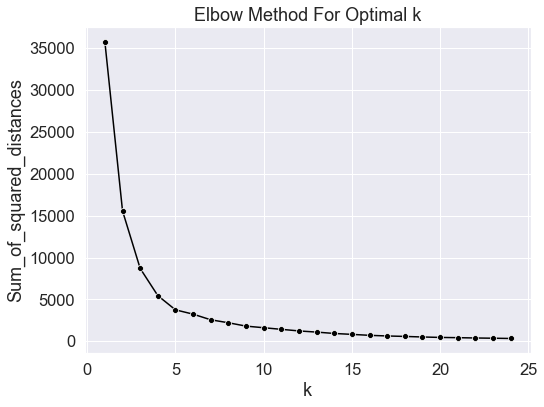

In [6]:
%%time
# determining the number of clusters
# A Function to scale the DataFrame by Standardizing the Values in Each Column
def scaleDataFrame(dataFrame):
    ss = StandardScaler()
    ss.fit(dataFrame)
    training_data_scaled = ss.transform(dataFrame)
    return pd.DataFrame(training_data_scaled)

def reduce_DataFrame(dataFrame, dims):
    pca = PCA(n_components=dims)
    reducedDF = pd.DataFrame(pca.fit_transform(dataFrame.values)) 
    # Rename the Columns of the Reduced DataFrame.
    reducedDF.columns = [f'Principal Component {i+1}' for i in range(dims)]
    return reducedDF

# A Function to plot an elbow plot to determine the optimal K value for a given Customer DataFrame
def plotElbow(dataFrame, maxK):
    #dataset1_standardized = scaleDataFrame(dataFrame)
    Sum_of_squared_distances = []
    K = range(1,maxK)
    for k in K:
        km = KMeans(n_clusters=k, init ='k-means++', random_state = 42)
        km = km.fit(dataFrame)
        Sum_of_squared_distances.append(km.inertia_)
    plt.figure(figsize=(8, 6))    
    sns.lineplot(K, Sum_of_squared_distances, marker='o', color='black')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    #print(K, Sum_of_squared_distances)
    
scaled_data = scaleDataFrame(training_data)
reduced_data  = reduce_DataFrame(scaled_data, 2)
plotElbow(reduced_data, 25)

In [7]:
#num_groups = cvss_data.v3_baseSeverity.nunique() # use the same number of groups as BaseSeverity levels
num_groups = 5 #select number of clusters based on above plot
kmeans = KMeans(n_clusters=num_groups) 
kmeans.fit(training_data_reduced) 

y_pred = kmeans.predict(training_data_reduced) 
kmeans.cluster_centers_

array([[ 1.41143247, -0.83928781],
       [-0.10549717,  2.35943688],
       [-2.34398065, -0.33361547],
       [ 2.0265015 ,  1.28246881],
       [-0.51138654,  0.44388761]])

In [8]:
kmeans.inertia_ # Lower is better. calculates min intra cluster distance (distance between points in a cluster)

3760.163206798579

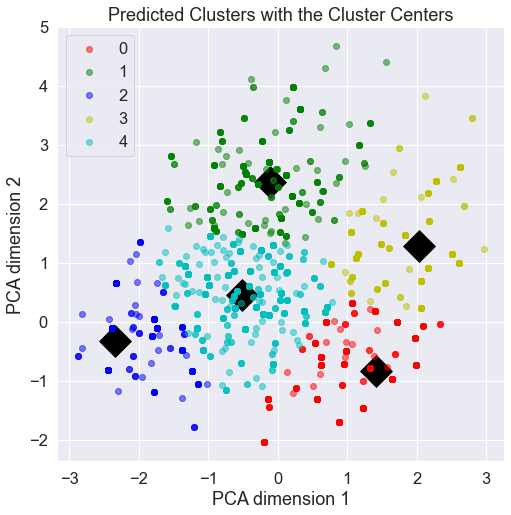

Wall time: 298 ms


In [10]:
%%time
# Visualise the dataset clusters
plt.figure(figsize=(8, 8))

x_col = 0
y_col = 1

# should have enough colours
prop_cycle = plt.rcParams['axes.prop_cycle']
colours = prop_cycle.by_key()['color'] 
colours = ['r','g','b','y', 'c', 'm', 'orange', 'darkgreen']  #you can also manually specify some colour values
colour_map = list(zip(np.unique(y_pred), colours))  

for (category, cl), center in zip(colour_map, kmeans.cluster_centers_): 
    cur_idx = y_pred == category # note that this time, we are now selecting based on y_pred == category
    plt.scatter(center[x_col], center[y_col], marker = "D", c = 'k', s = 500) # plot the cluster center
    plt.scatter(training_data_reduced[cur_idx, x_col], training_data_reduced[cur_idx, y_col], c = cl, alpha=0.5, label=category) 
plt.legend()    
plt.title('Predicted Clusters with the Cluster Centers')
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')
plt.show()

#### Use Silhouette coefficient to determine how good the clustering is

In [12]:
%%time
metrics.silhouette_score(training_data_reduced, kmeans.labels_)

Wall time: 1.96 s


0.6175960438082616

<AxesSubplot:ylabel='count'>

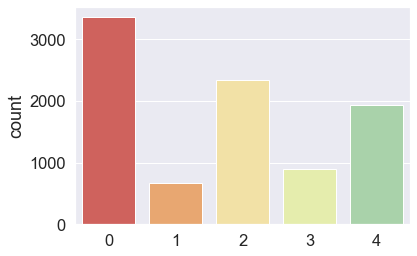

In [13]:
# countplot to check the number of clusters and number of base Severity in each cluster
sns.countplot(y_pred)

### 1.3 Analysing the Clusters
With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Your tasks are as follows:

#### 1.3.1 Comparison of summary statistics between clusters
1. Display and compare the mean of the CVSS Base Score, between all clusters in your model. 
2. Identify and explain the largest differences in metrics (including the mean of the CVSS Base Scores) between the clusters using a suitable summary statistic(s). (i.e. what are the defining characteristics of a cluster compared to other cluster(s)?)

<span style= 'float: right;'><b>[5 marks]</b></span>

In [14]:
%%time
k = np.max(kmeans.labels_)+1
df_clusters = [cvss_data[kmeans.labels_==i] for i in range(k)]

stat_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Base Score' : [round(df_clusters[i]['v3_baseScore'].mean(), 2) for i in range(k)],
    #'Scope UNCHANGED-Changed Ratio' : [str(len(df_clusters[i][df_clusters[i]['v3_scope']=="UNCHANGED"])) + ' : ' + 
    #                       str(len(df_clusters[i][df_clusters[i]['v3_scope']=="CHANGED"])) for i in range(k)]      
}

pd.DataFrame(stat_dict)

Wall time: 5.72 ms


,Cluster,Size,Mean Base Score
0,0,3358,9.01
1,1,674,5.02
2,2,2342,5.65
3,3,895,7.39
4,4,1941,6.66


In [15]:
k = np.max(kmeans.labels_)+1
df_clusters = [cvss_data[kmeans.labels_==i] for i in range(k)]

stat_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Base Score' : [round(df_clusters[i]['v3_baseScore'].mean(), 2) for i in range(k)],
    #'Scope UNCHANGED-Changed Ratio' : [str(len(df_clusters[i][df_clusters[i]['v3_scope']=="UNCHANGED"])) + ' : ' + 
    #                       str(len(df_clusters[i][df_clusters[i]['v3_scope']=="CHANGED"])) for i in range(k)]      
}

for col in cvss_data.iloc[:,2:10]: #from the relevant columns
    col_name = col + str(cvss_data[col].unique()) + " ratio"
    stat_dict[col_name] = [[len(df_clusters[i][df_clusters[i][col]==unique_val]) for unique_val in cvss_data[col].unique()] for i in range(k)]


df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mean Base Score,v3_attackVector['NETWORK' 'LOCAL' 'ADJACENT_NETWORK' 'PHYSICAL'] ratio,v3_attackComplexity['LOW' 'HIGH'] ratio,v3_privilegesRequired['NONE' 'LOW' 'HIGH'] ratio,v3_userInteraction['REQUIRED' 'NONE'] ratio,v3_scope['UNCHANGED' 'CHANGED'] ratio,v3_confidentialityImpact['HIGH' 'NONE' 'LOW'] ratio,v3_integrityImpact['HIGH' 'NONE' 'LOW'] ratio,v3_availabilityImpact['HIGH' 'NONE' 'LOW'] ratio
0,0,3358,9.01,"[2648, 644, 66, 0]","[3193, 165]","[2787, 571, 0]","[1130, 2228]","[3226, 132]","[3341, 13, 4]","[3269, 84, 5]","[3281, 66, 11]"
1,1,674,5.02,"[204, 438, 11, 21]","[632, 42]","[19, 457, 198]","[14, 660]","[623, 51]","[253, 283, 138]","[45, 586, 43]","[219, 384, 71]"
2,2,2342,5.65,"[2331, 1, 10, 0]","[2335, 7]","[1190, 823, 329]","[2329, 13]","[122, 2220]","[31, 95, 2216]","[48, 68, 2226]","[1, 2296, 45]"
3,3,895,7.39,"[221, 608, 22, 44]","[811, 84]","[38, 513, 344]","[13, 882]","[865, 30]","[877, 15, 3]","[864, 30, 1]","[879, 14, 2]"
4,4,1941,6.66,"[1561, 324, 55, 1]","[1813, 128]","[1706, 213, 22]","[536, 1405]","[1868, 73]","[732, 943, 266]","[208, 1549, 184]","[764, 1034, 143]"


In [16]:
# Or you may print the mean or median values
k = np.max(kmeans.labels_)+1
df_clusters = [cvss_data[kmeans.labels_==i] for i in range(k)]

stat_dict = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    'Mean Base Score' : [round(df_clusters[i]['v3_baseScore'].mean(), 2) for i in range(k)],
    #'Scope UNCHANGED-Changed Ratio' : [str(len(df_clusters[i][df_clusters[i]['v3_scope']=="UNCHANGED"])) + ' : ' + 
    #                       str(len(df_clusters[i][df_clusters[i]['v3_scope']=="CHANGED"])) for i in range(k)]      
}

for col in cvss_data.iloc[:,14:]: #from the relevant columns
    col_name = "mean " + col + " value"
    stat_dict[col_name] = [round(df_clusters[i][col].mean(), 2) for i in range(k)]


df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mean Base Score,mean v3_AV value,mean v3_AC value,mean v3_UI value,mean v3_S value,mean v3_PR value,mean v3_A value,mean v3_I value,mean v3_C value
0,0,3358,9.01,0.79,0.75,0.77,0.04,0.81,0.55,0.55,0.56
1,1,674,5.02,0.63,0.75,0.85,0.08,0.54,0.21,0.05,0.26
2,2,2342,5.65,0.85,0.77,0.62,0.95,0.74,0.00,0.22,0.22
3,3,895,7.39,0.61,0.74,0.85,0.03,0.50,0.55,0.54,0.55
4,4,1941,6.66,0.79,0.75,0.79,0.04,0.82,0.24,0.08,0.24


#### 1.3.2 Visual exploration of the distribution of Base Scores between clusters
(a) Visualise the distribution of the CVSS Base Score between each cluster. 


(b) Answer the following: Without the use of a hypothesis test, does the CVSS Base Score appear to differ significantly between these clusters? (You may reference the previous question (a) rather than reproducing answers)

<span style= 'float: right;'><b>[4 marks]</b></span>

Wall time: 0 ns


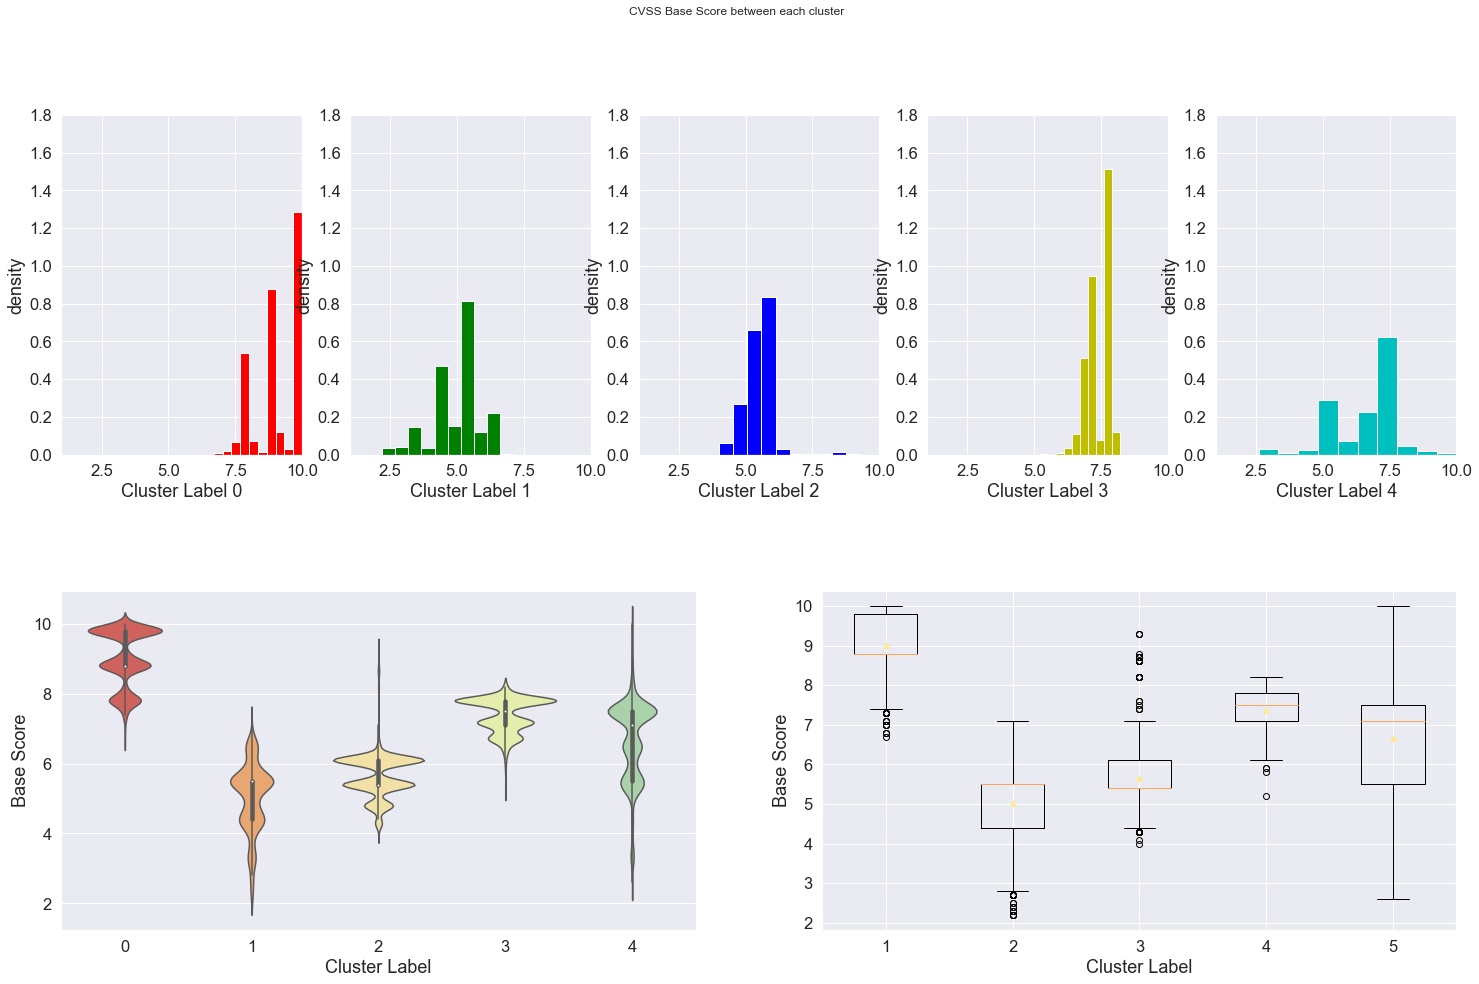

In [18]:
%time
#Trying a few options for plotting the distributions
import seaborn as sns
base_scores = [df_clusters[i]['v3_baseScore'] for i in range(k)]

plt.figure(figsize=[25,15])

# TRY PLOTTING AS HISTOGRAMS
for i, scores in enumerate(base_scores):
    plt.subplot(2,len(base_scores),i+1) 
    plt.hist(scores, density=True, color=colours[i]) # using density=True because counts won't be suitable for compairing a distribution

    plt.xlabel('Cluster Label '+str(i))
    plt.ylabel('density')
    plt.ylim((0,1.8)) # keeping the same y axis limits
    plt.xlim((1,10)) # keeping the same x axis limits
plt.subplots_adjust(hspace=0.4)

# TRY PLOTTING AS VIOLIN PLOTS (This seems to be the best option, even showing the box plots inside the violin), otherwise try distribution plots
plt.subplot(2, 2, 3) 
scores_df = pd.DataFrame()
for i, cluster_scores in enumerate(base_scores):
    scores_df = scores_df.append(pd.DataFrame({'label':i, 'base_scores':cluster_scores}), ignore_index=True)
sns.violinplot(data=scores_df, x='label', y='base_scores')

plt.xlabel('Cluster Label')
plt.ylabel('Base Score')

# TRY PLOTTING AS BOXPLOTS (Not the best option for showing multi-modal distributions)
plt.subplot(2, 2, 4) 
plt.boxplot(base_scores, showmeans=True)
plt.xlabel('Cluster Label')
plt.ylabel('Base Score')

plt.suptitle('CVSS Base Score between each cluster');


### 1.4 Comparing our model prediction based on Base Severity values
Do the cluster labels accurately categorise the Base Severity? Since you know the actual Base Severity classification values for this dataset, can you now compare the model predictions with the actual Base Severity values?

<b>HINT</b>: Present the Base Severity counts of the clusters found by the model like we did in Lab 06
OR plot the actual Base Severity groups and predicted clusters side by side 

<b>NOTE</b>: The number of unique Base Severity groups and the number of clusters in your trained model may be different.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [19]:
# comparing the Base Severity values with the model predicted labels
for i in range(np.max(kmeans.labels_)+1): # go thru all the labels [0, 1, 2, 3, 4]
    print(f'Cluster label {i}:')
    unique, counts = np.unique(cvss_data[kmeans.labels_==i]["v3_baseSeverity"], return_counts=True)
    print(np.asarray((unique, counts)), "\n")

Cluster label 0:
[['CRITICAL' 'HIGH' 'MEDIUM']
 [1610 1744 4]] 

Cluster label 1:
[['HIGH' 'LOW' 'MEDIUM']
 [1 86 587]] 

Cluster label 2:
[['CRITICAL' 'HIGH' 'MEDIUM']
 [3 32 2307]] 

Cluster label 3:
[['HIGH' 'MEDIUM']
 [714 181]] 

Cluster label 4:
[['CRITICAL' 'HIGH' 'LOW' 'MEDIUM']
 [19 979 62 881]] 



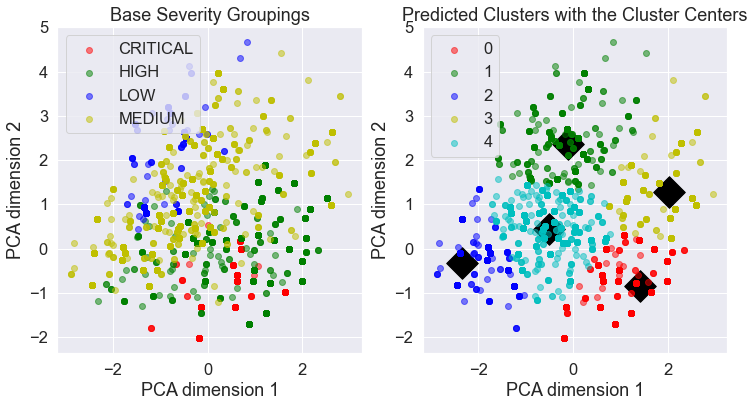

In [20]:
# comparing the clusters vs. the original grouping (color shouldn't matter)
plt.figure(figsize=(12, 6))

from sklearn.preprocessing import LabelEncoder

base_severity = [df_clusters[i]['v3_baseSeverity'] for i in range(k)]

le = LabelEncoder()
le.fit(cvss_data.v3_baseSeverity)
base_severity_labels = le.transform(cvss_data.v3_baseSeverity)

x_col = 0
y_col = 1

plt.subplot(1, 2, 1) 
for (category, cl), real_class in zip(colour_map, np.unique(base_severity_labels)):   
    cur_idx = base_severity_labels == category # note that this time, we are now selecting based on actual label == category
    plt.scatter(training_data_reduced[cur_idx, x_col], training_data_reduced[cur_idx, y_col], c = cl, alpha=0.5) 
plt.legend(np.unique(cvss_data.v3_baseSeverity))    
plt.title('Base Severity Groupings')
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')

plt.subplot(1, 2,2)
for (category, cl), center in zip(colour_map, kmeans.cluster_centers_): 
    cur_idx = y_pred == category # note that this time, we are now selecting based on y_pred == category
    plt.scatter(center[x_col], center[y_col], marker = "D", c = 'k', s = 500) # plot the cluster center
    plt.scatter(training_data_reduced[cur_idx, x_col], training_data_reduced[cur_idx, y_col], c = cl, alpha=0.5, label=category) 
plt.legend()
plt.title('Predicted Clusters with the Cluster Centers')
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')
plt.show()

### 1.5 Convincing the Procurement Team (for COMP6420 students only)
(a) With your evidence and analysis points well defined, it is now time to present your model and findings to the procurement team. Based on your findings, do you recommend the model in its current state or not? provide your reasoning. 

(b) Explain how this model could be used when they are determining what software should be purchased. Include an example of one of more imaginary products in your explanation, and how you can use this product's features to make a prediction from your trained model.
<span style= 'float: right;'><b>[7 marks]</b></span>

In [21]:
# YOUR CODE HERE
# e.g. use of the model for prediction (illustrated using two test products)
# columns used for training the model ['v3_AV', 'v3_AC', 'v3_UI', 'v3_S', 'v3_PR', 'v3_A', 'v3_I', 'v3_C']
product_features = [[0.55, 0.77, 0.85, 0, 0.62, 0.00, 0.00, 0.56],
                   [0.85, 0.77, 0.62, 0, 0.85, 0.56, 0.56, 0.56]] 

test_data_scaled = ss.transform(product_features) # scale the featues of the two products
test_data_reduced = pca.transform(test_data_scaled) # reduce to 2 dimensions
test_pred = kmeans.predict(test_data_reduced)
print("Predicted labels:", test_pred)

#Predict base score based on the mean score in the predicted cluster label
for prod, pred in zip(product_features, test_pred):
    print("Base score prediction for product with features", prod, ":", stat_dict['Mean Base Score'][pred])

Predicted labels: [1 0]
Base score prediction for product with features [0.55, 0.77, 0.85, 0, 0.62, 0.0, 0.0, 0.56] : 5.02
Base score prediction for product with features [0.85, 0.77, 0.62, 0, 0.85, 0.56, 0.56, 0.56] : 9.01


*****
## Q2: Classifciation using k-nearest neighbors and decision trees (20 marks for COMP2420, 28 marks for COMP6420)
In this question we are using a subset of data from a UCI Machine Learning Repository [dataset](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset) that contains parsed Bitcoin transaction graphs from 2009 January to 2018 December.  The BitcoinHeist dataset contains address features on the heterogeneous Bitcoin network to identify ransomware payments. The dataset contains the following features.

| Column Name    | Description    |
| :------------- | :------------- |
| address (String) | Bitcoin address |
| year (Integer) | Year |
| day (Integer) | Day of the year. 1 is the first day, 365 is the last day |
| length (Integer) | Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin. |
| weight (Float) |  Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. |
| count (Integer) | Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactions output?) of transactions. |
| looped (Integer) | Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to flat currency. |
| neighbors (Integer) | Indicates the number of neighbors a transaction had. |
| income  (Integer) | Satoshi amount (1 bitcoin = 100 million satoshis).
| label (Category String) | Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware) |


<b>Reference</b>: BitcoinHeist: Topological Data Analysis for Ransomware Detection on the Bitcoin Blockchain. Akcora, Cuneyt Gurcan and Li, Yitao and Gel, Yulia R and Kantarcioglu, Murat. [arXiv preprint](arxiv:1906.07852). 2019

In this question, you are asked to predict whether a given record is **ransom** (i.e., known to be ransomware) or **white** (i.e., not known to be ransomware). For this purpose, we'll ask you to train two classification models (namely, k-nearest neighbors and decision trees). You are also expected to do an experiment on a range of hyperparameters for your models. Later, you will be comparing the performance of the two models.

HINT: 
- For comparing two models on the same dataset, we'll usually keep the same train-test split of the dataset. 
- You are also strongly encouraged to use cross validation to choose the hyperparameters of the two models.


### 2.1: Load and process the data
Your first task is to load and pre-process the data for the classifciation task. Remember that we are asking you to predict whether a given record is ransom (i.e., known to be ransomware).

The data to be loaded is found in `data/BitcoinHeistDataSample.csv`. 
<span style= 'float: right;'><b>[1 mark]</b></span>

In [26]:
# YOUR CODE HERE
fileName = "./data/BitcoinHeistDataSample.csv"

# Import data
# Create dataframe of csv files 
try:
    data_df = pd.read_csv(fileName)
except OSError:
    print("Could not read file:",fileName)
except FileNotFoundError:
    print(f"file {fileName} not found")
    
# check for null
if data_df.isnull().sum().sum() == 0:
    print('No more nan values.')
else:
    print('There are still some missing values.')

No more nan values.


In [27]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,18uMmC74nRJdWUEHxbDJgm8VWMteQN68S1,2014,2,38,0.166997,9,0,1,3.778000e+07,white
1,16ucAymaXwPpMVdXtA4FE9sWQH7RrK4P8v,2014,105,144,6.129424,1906,1889,16,3.291332e+10,paduaCryptoWall
2,1HwKwCYZHZZnGAn6t6pRUPVtq71mPwGTXc,2012,17,0,1.000000,1,0,1,1.100000e+09,white
3,1MsCsEPC43GC3j2GA96nV36NysKX747tE,2014,172,144,0.680399,853,771,2,2.130000e+09,paduaCryptoWall
4,15Jjgw3fjg2H2KkZjKZrPHP2hHautmdWaf,2017,23,144,0.012218,3880,0,2,4.213180e+07,white


In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    10000 non-null  object 
 1   year       10000 non-null  int64  
 2   day        10000 non-null  int64  
 3   length     10000 non-null  int64  
 4   weight     10000 non-null  float64
 5   count      10000 non-null  int64  
 6   looped     10000 non-null  int64  
 7   neighbors  10000 non-null  int64  
 8   income     10000 non-null  float64
 9   label      10000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


### 2.2 Data Analysis and Visualisation
 
We are interested in looking at how the volume of **ransom** and **white** data points differ across the years in this sample dataset. Your task is to come up with a suitable plot to visualise this and comment on your observations.

**NOTE**: The dataset is a sub-set of the original dataset that is not representative of the real spread between the actual labels. Hence, the conclusions we can reach based on the above plot may not hold for the full dataset, which is out of scope for this question.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [29]:
data_df.sort_values(by="year", ascending=True, inplace=True)
data_df

,address,year,day,length,weight,count,looped,neighbors,income,label
4999,12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza,2011,360,2,0.644960,28,0,8,3.380367e+08,montrealCryptoLocker
7956,1BohA4WuHxZEQv42foD7Lfh2WrvA91yH85,2011,65,26,0.000506,29,0,2,2.255000e+09,white
7949,1JfLtBvQSxMMS8FBYaNtWHQDw2Tf1bVUE1,2011,332,4,0.092677,18,0,2,9.333113e+07,white
4541,1LsCkpD9KFbAuZL3QCtJeHnoZ1dqgcWxzS,2011,81,6,0.608333,38,0,1,1.010000e+08,white
7915,1KNiBMpE1LFbrsBywCWa6A4bypkxJiqoPH,2011,65,18,0.003906,1,0,1,3.089000e+09,white
...,...,...,...,...,...,...,...,...,...,...
2518,1C41Y9gKPFt7BCYPeaUDBPViH6bqCujRUk,2018,299,12,0.000868,1,0,2,3.000000e+08,white
297,14bdeRcqciYQqE9y45BwEVmtoHamCZTPKT,2018,11,10,0.500000,1,0,2,3.870411e+07,white
7965,39e9TcZDAaYkeqWVXQn6PCyJKy8SN1xCmA,2018,253,0,1.000000,1,0,1,8.749574e+08,white
3760,16e5S35csqAf3gvEf6nTRVHKdMyMjoxsrC,2018,12,2,1.000000,1,0,2,8.866043e+07,white


In [30]:
def sum_except_first(lst):
    '''Helper function to sum all the elements of a list except first'''
    total = 0
    res = []
    for elem in lst:
        if elem == lst[0]:
            res.append(elem)
        else:
            total = total + elem
    res.append(total)
    return res

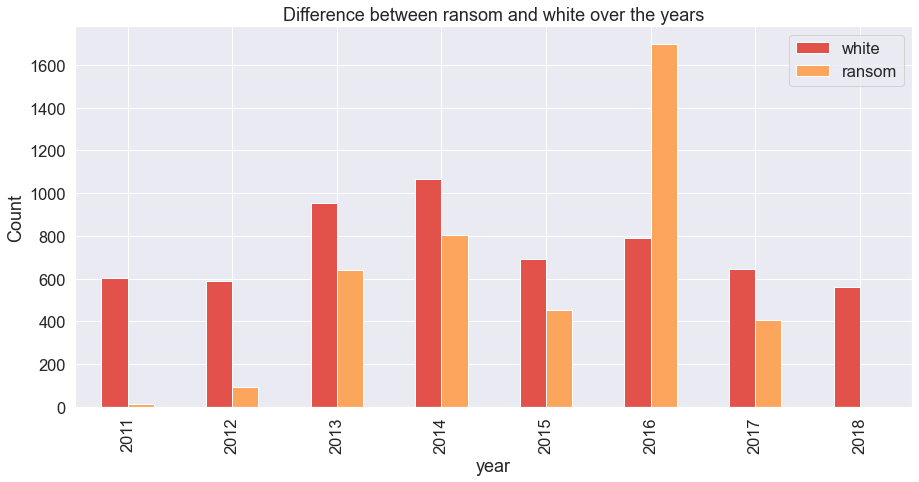

Wall time: 222 ms


In [31]:
%%time
# YOUR CODE HERE
# Getting all the lists of labels for each year
_2011 = data_df.query('year==2011')['label'].value_counts().to_list()
_2011 = sum_except_first(_2011)
_2012 = data_df.query('year==2012')['label'].value_counts().to_list()
_2012 = sum_except_first(_2012)
_2013 = data_df.query('year==2013')['label'].value_counts().to_list()
_2013 = sum_except_first(_2013)
_2014 = data_df.query('year==2014')['label'].value_counts().to_list()
_2014 = sum_except_first(_2014)
_2015 = data_df.query('year==2015')['label'].value_counts().to_list()
_2015 = sum_except_first(_2015)
_2016 = data_df.query('year==2016')['label'].value_counts().to_list()
_2016 = sum_except_first(_2016)
_2017 = data_df.query('year==2017')['label'].value_counts().to_list()
_2017 = sum_except_first(_2017)
_2018 = data_df.query('year==2018')['label'].value_counts().to_list()
_2018 = sum_except_first(_2018)

# Creating a new dataframe with the lists
data = [["2011", *_2011],
        ["2012", *_2012],
        ["2013", *_2013],
        ["2014", *_2014],
        ["2015", *_2015],
        ["2016", *_2016],
        ["2017", *_2017],
        ["2018", *_2018]]

df=pd.DataFrame(data, columns=["year", "white", "ransom"])

# Plot the graphs 
df.plot(x="year", y=["white", "ransom"], kind="bar", figsize=(15,7))
plt.ylabel("Count")
plt.title('Difference between ransom and white over the years')

plt.show()


In [32]:
# Label encode label column
data_df_copy = data_df.copy()
le = LabelEncoder()
data_df_copy['label'] = le.fit_transform(data_df_copy['label'])
data_df_copy['address'] = le.fit_transform(data_df_copy['address'])

data_df_copy.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
4999,333,2011,360,2,0.644960,28,0,8,3.380367e+08,3
7956,3476,2011,65,26,0.000506,29,0,2,2.255000e+09,22
7949,5813,2011,332,4,0.092677,18,0,2,9.333113e+07,22
4541,6560,2011,81,6,0.608333,38,0,1,1.010000e+08,22
7915,6067,2011,65,18,0.003906,1,0,1,3.089000e+09,22


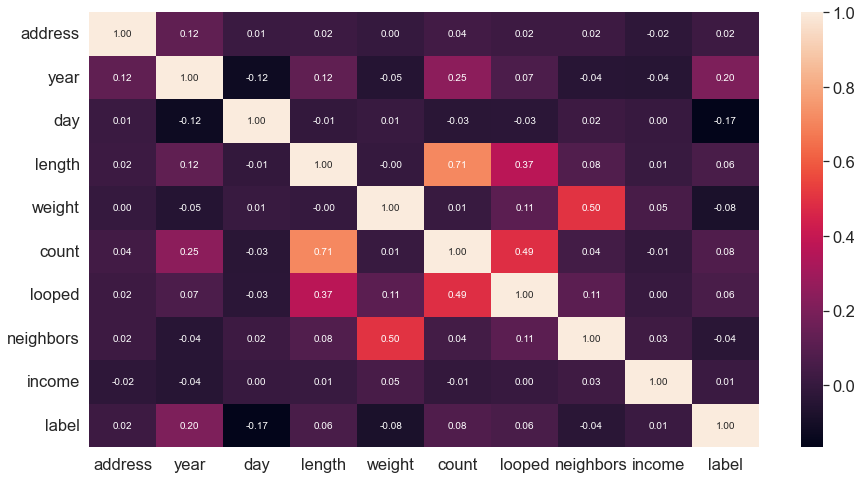

label has a good correlation with year
Since day, weight, and neighbors have negative correlation with label, they can be dropped
Wall time: 507 ms


In [33]:
%%time
# Correlation Matrix
def plot_correlation(data):
    '''Plot a correlation matrix of given data'''
    rcParams['figure.figsize'] = 15, 8
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    
plot_correlation(data_df_copy)
print('label has a good correlation with year')
print("Since day, weight, and neighbors have negative correlation with label, they can be dropped")

In [34]:
data_df.drop(columns=['day','weight','neighbors'], axis=1, inplace=True)
data_df.head()

,address,year,length,count,looped,income,label
4999,12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza,2011,2,28,0,3.380367e+08,montrealCryptoLocker
7956,1BohA4WuHxZEQv42foD7Lfh2WrvA91yH85,2011,26,29,0,2.255000e+09,white
7949,1JfLtBvQSxMMS8FBYaNtWHQDw2Tf1bVUE1,2011,4,18,0,9.333113e+07,white
4541,1LsCkpD9KFbAuZL3QCtJeHnoZ1dqgcWxzS,2011,6,38,0,1.010000e+08,white
7915,1KNiBMpE1LFbrsBywCWa6A4bypkxJiqoPH,2011,18,1,0,3.089000e+09,white


### 2.3: Classification using k-Nearest Neighbors
Train a KNN model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- How many neighbors k, did you use for your model? What are the values of the other hyperparameters of your model? 
- How did you decide on the hyper-parameters of your model? 
- Print the validation, training and testing scores for your model
<span style= 'float: right;'><b>[6 marks]</b></span>

In [35]:
# YOUR CODE HERE
# Scaling the data
sc = StandardScaler()

cols = ['year', 'length', 'count', 'looped', 'income']
data_df[cols] = sc.fit_transform(data_df[cols])

# Label Encoding address
le = LabelEncoder()
data_df['address'] = le.fit_transform(data_df['address'])

data_df.head()

,address,year,length,count,looped,income,label
4999,333,-1.966011,-0.711943,-0.408964,-0.220435,-0.041144,montrealCryptoLocker
7956,3476,-1.966011,-0.306058,-0.408334,-0.220435,-0.003442,white
7949,5813,-1.966011,-0.678119,-0.415263,-0.220435,-0.045957,white
4541,6560,-1.966011,-0.644295,-0.402664,-0.220435,-0.045806,white
7915,6067,-1.966011,-0.441353,-0.425972,-0.220435,0.012961,white


In [36]:
# Selecting the features
X = data_df.iloc[:,:-1].values # feature variables
y = data_df.iloc[:, -1].values # target variable

# Splitting and train the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (8000, 6) (8000,)
Testing set shape:  (2000, 6) (2000,)


In [37]:
%%time
# Find best params through Grid search
# Instantiate the model
knn = KNeighborsClassifier()

# Hyperparameters to tune
hyperparameters = {'n_neighbors': np.arange(1,10),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']}

# Instantiate GridSearchCV and pass in the parameters and cross_validation of 5 folds
halvingGridSearch = HalvingGridSearchCV(knn, hyperparameters, n_jobs=-1, min_resources="exhaust", factor=3, random_state=42, cv=5)

# Fitting the data
knn_model = halvingGridSearch.fit(X_train, y_train)
print("The best parameters are:", knn_model.best_params_)
print("The best score is:", knn_model.best_score_)

The best parameters are: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
The best score is: 0.5727158948685858
Wall time: 2.86 s


In [38]:
# Fitting the data and getting the train, test, cross val scores of untuned model
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Scoring
print("Training Score: {:.4f}".format(knn_model.score(X_train, y_train)))
print("Test score: {:.4f}".format(knn_model.score(X_test, y_test)))
print("Cross validated scores:",(cross_val_score(knn, X_train, y_train, cv=k_fold).mean()))

Training Score: 0.6459
Test score: 0.4765
Cross validated scores: 0.484


In [39]:
# Fitting the data and getting the train, test, cross val scores of hypertuned model
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
knn_model = knn.fit(X_train, y_train)

# Scoring
print("Training Score: {:.4f}".format(knn_model.score(X_train, y_train)))
print("Test score: {:.4f}".format(knn_model.score(X_test, y_test)))
print("Cross validated scores:",(cross_val_score(knn, X_train, y_train, cv=k_fold).mean()))

Training Score: 1.0000
Test score: 0.5660
Cross validated scores: 0.57175


### 2.4: Classification using Decision trees
Train a Decision Tree model using this dataset to predict whether a given record is ransom (i.e., known to be ransomware).
- How did you prepare the dataset for this task?
- What are the hyperparameters of your model?
- How did you decide on the hyperparameters for your model? 
- Visualise the decision tree that you trained (display the tree in the notebook, you may optionally save this as a figure; If you save the tree as a figure, you should include the figure in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![tree.png](./img/tree.png)` where `tree.png` is the name of your figure.)
- Print the validation, training and testing scores for your model
<span style= 'float: right;'><b>[6 marks]</b></span>

In [40]:
# YOUR CODE HERE
# Selecting the features
I = data_df.iloc[:,:-1].values # feature variables
j = data_df.iloc[:, -1].values # target variable

# Splitting and train the data 
I_train, I_test, j_train, j_test = train_test_split(I, j, train_size=0.8, random_state=42)
print('Training set shape: ', I_train.shape, j_train.shape)
print('Testing set shape: ',  I_test.shape, j_test.shape)

Training set shape:  (8000, 6) (8000,)
Testing set shape:  (2000, 6) (2000,)


In [41]:
%%time
# Find best params through Grid search
# Instantiate the model
dt = DecisionTreeClassifier()

# Create a list of hyperparameters dictionary
hyperparameters = {'max_depth': range(2,20,2),
                   'min_samples_split': range(2, 20, 2), 
                   'min_samples_leaf': range(2, 20, 2) }

# Instantiate  GridSearchCV and pass in the parameters
halvingGridSearch = HalvingGridSearchCV(dt, hyperparameters, n_jobs=-1, min_resources="exhaust", factor=3, random_state=42, cv=5)

# Fitting the data
dt_model = halvingGridSearch.fit(I_train, j_train)
print("The best parameters are:", dt_model.best_params_)
print("The best score is:", dt_model.best_score_)

The best parameters are: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 18}
The best score is: 0.7414814814814815
Wall time: 3.85 s


In [42]:
# Fitting the data and getting the train, test, cross val scores of untuned model
decisionTree = DecisionTreeClassifier()
decisionTree_model = decisionTree.fit(I_train, j_train)

# Scoring
print("Training set score: {:.3f}".format(decisionTree.score(I_train,j_train)))
print("Test set score: {:.3f}".format(decisionTree.score(I_test,j_test)))
print("Cross validated scores:",(cross_val_score(decisionTree, I_train, j_train, cv=k_fold).mean()))

Training set score: 1.000
Test set score: 0.724
Cross validated scores: 0.71825


In [43]:
# Fitting the data and getting the train, test, cross val scores of hypertuned model
decisionTree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=18)
decisionTree_model = decisionTree.fit(I_train, j_train)

# Scoring
print("Training set score: {:.3f}".format(decisionTree.score(I_train,j_train)))
print("Test set score: {:.3f}".format(decisionTree.score(I_test,j_test)))
print("Cross validated scores:",(cross_val_score(decisionTree, I_train, j_train, cv=k_fold).mean()))

Training set score: 0.804
Test set score: 0.762
Cross validated scores: 0.7621249999999999


In [44]:
# export tree
tree.export_graphviz(decisionTree_model, "tree.dot")

![tree.png](./img/tree.png)

### 2.5: Model comparision
Compare the performance of the two models that you trained in 2.3 and 2.4. 
- Include the Confusion Matrix, Accuracy, Precision, Recall and F1-scores in your comparision.
- Which model is better based on the metrics you obtained? 
- Discuss the performance of the two models in terms of the False Negatives and False Positives (assume that we consider False Negatives (incorrectly classifying a ransom record as white) are more harmful than False Positives (incorrectly classifying white record as ransom))
<span style= 'float: right;'><b>[3 marks]</b></span>

In [45]:
# YOUR CODE HERE
# Classification report of tree
y_pred = decisionTree_model.predict(X_test)
print('----------------------------------------------------------------------')
print('Decision Tree Classification report')
print('----------------------------------------------------------------------')
print(classification_report(y_test, y_pred))

# Classification report of knn
j_pred = knn_model.predict(I_test)
print('----------------------------------------------------------------------')
print('KNN Classification report')
print('----------------------------------------------------------------------')
print(classification_report(j_test, j_pred))


----------------------------------------------------------------------
Decision Tree Classification report
----------------------------------------------------------------------
                             precision    recall  f1-score   support

                montrealAPT       0.00      0.00      0.00         2
       montrealCryptConsole       0.00      0.00      0.00         1
           montrealCryptXXX       0.92      0.97      0.94        62
       montrealCryptoLocker       0.74      0.76      0.75       247
montrealCryptoTorLocker2015       0.00      0.00      0.00         2
          montrealDMALocker       0.00      0.00      0.00         6
        montrealDMALockerv3       0.00      0.00      0.00         8
              montrealGlobe       0.00      0.00      0.00         1
          montrealNoobCrypt       0.00      0.00      0.00        18
             montrealSamSam       0.00      0.00      0.00         6
        montrealVenusLocker       0.00      0.00      0.00    

In [46]:
%%time
# Confusion matrix of tree
cm = metrics.confusion_matrix(y_test, y_pred)
print("DECISION TREE CONFUSION MATRIX:")
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# False positive rate
FPR = FP/(FP+TN)
print("False positive rate:", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate:", FNR)
print("\n")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy:",ACC.mean())

DECISION TREE CONFUSION MATRIX:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  60   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0 188   0   0   0   0   0   0   0  14   0   0   0   0  45]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0  10   0   0   0   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 256   0   0   0   0  27]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0

In [47]:
# Confusion matrix of knn
com = metrics.confusion_matrix(j_test, j_pred)
print("KNN CONFUSION MATRIX:")
print(com)

FP = com.sum(axis=0) - np.diag(com)  
FN = com.sum(axis=1) - np.diag(com)
TP = np.diag(com)
TN = com.sum() - (FP + FN + TP)

# False positive rate
FPR = FP/(FP+TN)
print("False positive rate:", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate:", FNR)
print("\n")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall Accuracy:",ACC.mean())

KNN CONFUSION MATRIX:
[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   7   3   0   0   1   0   0   0   0   0   1   0   0   1   3  46]
 [  0   0   0 183   0   0   0   0   0   0   0   0   9   0   0   2   2  51]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   4   0   0   0   0   0   1   0   0   1   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   0   1   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0  12   0   0   0   0   0   2   0   0 176   0   0   3   3  87]
 [ 

### 2.6: Dealing with unbalanced datasets (for COMP6420 students only)
In the original dataset, we have a larger number of **white** records than **ransom**, as expected.  To be exact, 2875284 of the 2916697 rows in the original dataset represented records not known to be ransomware. 

Briefly state how you would deal with such unbalanaced datasets in classification problems. Give at least two techniques that can be applied. You may refer techniques that can be applied to other classification models as well (i.e. you don't have to limit your answer to techniques that can be applied to k-nearest neighbors and decision trees). Don't forget to give your references.
<span style= 'float: right;'><b>[8 marks]</b></span>